# 2024 NH 투자증권 빅데이터 경진대회

#### 종합코드

## 1. 데이터 불러오기

### 필수 라이브러리

이윤서 코드 (기준 6개)

1. 6번 파일(8월 27일 기준 ETF의 구성 종목)에서 시가총액 큰 것 순서대로 etf 추출하기

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
import sys
sys.version

'3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]'

In [42]:
etf_holdings = pd.read_csv('/content/NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='cp949')
nw_fc_stk_iem_ifo = pd.read_csv('/content/NH_CONTEST_NW_FC_STK_IEM_IFO.csv', encoding='cp949')
stk_dt_qut = pd.read_csv('/content/NH_CONTEST_STK_DT_QUT.csv', encoding='cp949')
historical_dividend = pd.read_csv('/content/NH_CONTEST_DATA_HISTORICAL_DIVIDEND.csv', encoding='cp949')

In [43]:
etf_holdings_result = etf_holdings.groupby('etf_tck_cd')['mkt_vlu'].sum().reset_index()
ETF_top = etf_holdings_result.sort_values(by='mkt_vlu', ascending=False)
display(ETF_top)

,etf_tck_cd,mkt_vlu
107,VTI,1632609396735
105,VOO,1168848786417
83,SPY,537149441711
40,IVV,486185746208
67,QQQ,270418248248
...,...,...
121,YMAX,48564080
34,HDRO,18093000
95,TSL,10395509
3,AMDL,9788048


2. 1번 파일(8월 27일 기준 해외종목 정보)에서 업종분류명, 섹터분류명, 산업명 열 빼와서 6번 파일(8월 27일 기준 ETF의 구성 종목)과 병합하기

In [44]:
nw_fc_stk_iem_ifo_selected = nw_fc_stk_iem_ifo[['tck_iem_cd', 'btp_cfc_nm', 'ser_cfc_nm', 'ids_nm', 'mkt_pr_tot_amt']]
etf_holdings_and_nw_fc_stk_iem_ifo = pd.merge(etf_holdings, nw_fc_stk_iem_ifo_selected, on='tck_iem_cd', how='inner')
display(etf_holdings_and_nw_fc_stk_iem_ifo)

,etf_tck_cd,tck_iem_cd,mkt_vlu,fc_sec_eng_nm,fc_sec_krl_nm,stk_qty,wht_pct,sec_tp,btp_cfc_nm,ser_cfc_nm,ids_nm,mkt_pr_tot_amt
0,AAPB,AAPL,36858666,AAPL,애플,215737,66.778,ST,Phones & Smart Phones,Technology,Consumer Electronics,3454684.01
1,AAPB,USD,18337384,US Dollars,프로셰어즈 울트라 반도체,0,33.222,EF,-,-,-,0.00
2,AMDL,USD,3257693,US Dollars,프로셰어즈 울트라 반도체,0,33.282,EF,-,-,-,0.00
3,AMDL,AMD,6530355,AMD,에이엠디,36558,66.718,ST,Semiconductors (NEC),Technology,Semiconductors,242772.28
4,CLOU,TWLO,15400502,TWILIO INC - A,트윌리오,254933,4.266,ST,Software (NEC),Technology,Software - Infrastructure,9743.59
...,...,...,...,...,...,...,...,...,...,...,...,...
18511,TAN,CSIQ,18712550,Canadian Solar Inc,캐나디안 솔라,1382020,1.897,ST,Photovoltaic Solar Systems & Equipment,Technology,Solar,895.02
18512,TAN,AY,18652217,Atlantica Sustainable Infrastructure PLC,아틀란티카 일드,843610,1.891,ST,Alternative Electric Utilities,Utilities,Utilities - Renewable,2588.02
18513,TAN,RNW,7690201,ReNew Energy Global PLC,리뉴 에너지,1296830,0.780,ST,Renewable IPPs,Utilities,Utilities - Renewable,2063.37
18514,TAN,AMPS,5794798,Altus Power Inc,알터스 파워,1833797,0.587,ST,Solar Electric Ultilities,Utilities,Utilities - Renewable,487.97


(아래 df = etf명, etf 구성 종목, 보유종목가치, 보유종목비중, 업종분류명, 섹터분류명, 산업명)
3. ETF 종목들을 섹터분류명(ser_cfc_nm), 총 12개 섹터로 분류

In [45]:
df = etf_holdings_and_nw_fc_stk_iem_ifo[['etf_tck_cd','tck_iem_cd', 'mkt_vlu', 'wht_pct','btp_cfc_nm', 'ser_cfc_nm', 'ids_nm']]
# ETF_top.etf_tck_cd.unique()
# lst= ['VTI', 'VOO', 'SPY', 'IVV', 'QQQ', 'VEA', 'VIG', 'VWO', 'TQQQ',
#        'VYM', 'XLK', 'IEMG', 'IWM', 'VNQ', 'SCHD', 'VT', 'SPLG', 'XLF',
#        'XLV', 'XLE', 'SOXL', 'DIA', 'JEPI', 'QQQM', 'DGRO', 'SPYG',
#        'SPYV', 'MGK', 'SMH', 'TMF', 'XLP', 'XLU', 'MOAT', 'JEPQ', 'GDX',
#        'DGRW', 'SOXX', 'SPXL', 'QLD', 'NOBL', 'UPRO', 'SSO', 'PFF',
#        'TECL', 'TNA', 'QYLD', 'IBB', 'PAVE', 'XBI', 'FAS', 'XLRE', 'CIBR',
#        'ITA', 'NVDL', 'ARKK', 'SPYD', 'IHI', 'TSLL', 'SPHD', 'DIVO',
#        'PGX', 'LABU', 'XYLD', 'YINN', 'SKYY', 'URA', 'BOTZ', 'DPST',
#        'USD', 'ICLN', 'AOR', 'UDOW', 'AIQ', 'COPX', 'GRID', 'URTY',
#        'ARKW', 'ARKG', 'RYLD', 'CONL', 'NVDU', 'LIT', 'TLTW', 'JETS',
#        'NAIL', 'TAN', 'ARKF', 'ARKQ', 'RPAR', 'SVOL', 'CWEB', 'SDIV',
#        'QCLN', 'DFEN', 'DIV', 'AMZU', 'SOXQ', 'METV', 'DRIV', 'WEBL',
#        'CLOU', 'NUSI', 'AAPU', 'MSFU', 'KRBN', 'GGLL', 'FBL', 'ARKX',
#        'KBWY', 'GPIQ', 'GPIX', 'KLIP', 'KORU', 'RETL', 'MSOX', 'AAPB',
#        'AWAY', 'YMAX', 'HDRO', 'TSL', 'AMDL', 'NVD']

df_array=[]
sector_result_df = pd.DataFrame()

for ticker in ETF_top.etf_tck_cd.unique():
    filtered_df = df[df['etf_tck_cd'] == ticker]

    # ser_cfc_nm으로 그룹화하고 wht_pct 합계 계산
    grouped_df = filtered_df.groupby('ser_cfc_nm')['wht_pct'].sum().reset_index()

    # ticker 열 추가
    grouped_df['etf_tck_cd'] = ticker

    # 결과를 합치기
    sector_result_df = pd.concat([sector_result_df, grouped_df], ignore_index=True)

sector_result_df

,ser_cfc_nm,wht_pct,etf_tck_cd
0,-,0.098,VTI
1,Basic Materials,2.153,VTI
2,Communication Services,8.578,VTI
3,Consumer Cyclical,10.047,VTI
4,Consumer Defensive,5.465,VTI
...,...,...,...
657,Consumer Cyclical,55.556,TSL
658,-,33.282,AMDL
659,Technology,66.718,AMDL
660,-,33.479,NVD


3. ETF 구성 종목 개수 (분산투자 정도 파악 목적, 기준3)

In [46]:
etf_count = etf_holdings.groupby('etf_tck_cd')['tck_iem_cd'].count()

etf_count_result = etf_count.reset_index(name='tck_iem_cd_count')
etf_count_result

,etf_tck_cd,tck_iem_cd_count
0,AAPB,2
1,AAPU,10
2,AIQ,85
3,AMDL,2
4,AMZU,7
...,...,...
117,XLU,33
118,XLV,63
119,XYLD,498
120,YINN,12


4. 시가총액 큰 것 순서대로 ETF들의 거래량 내림차순 정렬
2번파일의 acl_trd_qty(누적거래수량) 활용

In [47]:
etf_tck_cd_list = ETF_top['etf_tck_cd'].tolist()

stk_dt_qut['tck_iem_cd'] = stk_dt_qut['tck_iem_cd'].str.strip()
filtered_stk_dt_qut = stk_dt_qut[stk_dt_qut['tck_iem_cd'].isin(etf_tck_cd_list)]
stk_dt_qut_result = filtered_stk_dt_qut.groupby('tck_iem_cd')['acl_trd_qty'].sum().reset_index()
stk_dt_qut_result_sorted = stk_dt_qut_result.sort_values(by='acl_trd_qty', ascending=False)
stk_dt_qut_result_sorted

,tck_iem_cd,acl_trd_qty
77,SOXL,4.791392e+09
94,TQQQ,3.532010e+09
83,SPY,3.213682e+09
96,TSLL,3.014736e+09
113,XLF,2.363635e+09
...,...,...
32,GPIX,3.500320e+06
11,ARKX,3.406643e+06
34,HDRO,2.650521e+06
71,RPAR,2.594178e+06


5. 시가-종가 간 차이와 고가-저가 간 차이 사이의 괴리 파악 (주가 변동성 파악 목적)

In [48]:
filtered_stk_dt_qut = stk_dt_qut[stk_dt_qut['tck_iem_cd'].isin(stk_dt_qut_result_sorted['tck_iem_cd'])]

# gap_ong_end 열 생성 후, 시가와 종가의 차이를 열에 넣기
filtered_stk_dt_qut['gap_ong_end'] = np.where(
    filtered_stk_dt_qut['iem_ong_pr'] > filtered_stk_dt_qut['iem_end_pr'],
    filtered_stk_dt_qut['iem_ong_pr'] - filtered_stk_dt_qut['iem_end_pr'],
    filtered_stk_dt_qut['iem_end_pr'] - filtered_stk_dt_qut['iem_ong_pr']
)
# gap_hi_low 열 생성, 고가 - 저가를 열에 넣기
filtered_stk_dt_qut['gap_hi_low'] = filtered_stk_dt_qut['iem_hi_pr'] - filtered_stk_dt_qut['iem_low_pr']
filtered_stk_dt_qut

# tck_iem_cd를 기준으로 평균 계산
result_avg = filtered_stk_dt_qut.groupby('tck_iem_cd').agg(
    avg_gap_ong_end=('gap_ong_end', 'mean'),
    avg_gap_hi_low=('gap_hi_low', 'mean')
    ).reset_index()
result_avg

# avg_gap_ong_end와 avg_gap_hi_low 기준으로 내림차순 정렬
sorted_result_avg = result_avg.sort_values(by=['avg_gap_ong_end', 'avg_gap_hi_low'], ascending=False).reset_index(drop=True)
sorted_result_avg

##시가-종가 차이, 저가-고가 차이의 평균치를 합산하여 주가 변동성이 큰 순서대로 나열하기

# avg_gap_ong_end와 avg_gap_hi_low의 합을 새로운 열로 추가
sorted_result_avg['total_gap'] = sorted_result_avg['avg_gap_ong_end'] + sorted_result_avg['avg_gap_hi_low']

# 결과를 새로운 데이터 프레임으로 생성
sum_result_avg = sorted_result_avg[['tck_iem_cd', 'total_gap']]
sum_result_avg

<ipython-input-48-03f96f5aaf63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stk_dt_qut['gap_ong_end'] = np.where(
<ipython-input-48-03f96f5aaf63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stk_dt_qut['gap_hi_low'] = filtered_stk_dt_qut['iem_hi_pr'] - filtered_stk_dt_qut['iem_low_pr']


,tck_iem_cd,total_gap
0,NVDU,14.416992
1,USD,13.823870
2,SMH,11.182910
3,NAIL,11.779965
4,QQQ,10.631935
...,...,...
117,QYLD,0.228814
118,DIV,0.233584
119,HDRO,0.199435
120,RYLD,0.217886


6. 배당금의 평균치를 가장 최근의 종가로 나눠서 시가배당률을 계산한다.
-> 이유 : 투자자들이 etf를 산 시점의 가격으로 배당률이 정해지기 때문에, 즉, 매일매일 시가배당률이 바뀌기 때문에 배당금 평균치와 최근 종가 데이터 모두 크롤링을 사용하여 구하는 게 베스트일 거라고 생각함.
- 배당금 평균치는 가장 늦게 배당금을 지급하기 시작한 etf를 찾고, 그 일자를 기준으로 현재까지의 배당금 데이터를 추출. (기준 6)

In [49]:
# 내부 조인 수행
historical_dividend_with_ETF_top = pd.merge(historical_dividend, ETF_top, on='etf_tck_cd', how='inner')

required_columns = [
    'etf_tck_cd',
    'ediv_dt',
    'ddn_amt',
    'aed_stkp_ddn_amt',
    'ddn_bse_dt',
    'ddn_pym_dt',
    'pba_dt',
    'ddn_pym_fcy_cd'
]
filtered_historical_dividend_with_ETF_top = historical_dividend_with_ETF_top[required_columns]

filtered_historical_dividend_with_ETF_top

,etf_tck_cd,ediv_dt,ddn_amt,aed_stkp_ddn_amt,ddn_bse_dt,ddn_pym_dt,pba_dt,ddn_pym_fcy_cd
0,AAPB,20231227,4.30641,4.30641,20231228,20231229,20231226,Monthly
1,AAPU,20220920,0.01041,0.01041,20220921,20220927,20220919,Quarterly
2,AAPU,20230919,0.14642,0.14642,20230920,20230926,20230918,Quarterly
3,AAPU,20231221,0.27249,0.27249,20231222,20231229,20231220,Quarterly
4,AAPU,20230321,0.07802,0.07802,20230322,20230328,20230320,Quarterly
...,...,...,...,...,...,...,...,...
995,YMAX,20240717,0.65160,0.65160,20240717,20240718,20240122,Monthly
996,YMAX,20240614,0.73000,0.73000,20240614,20240617,20240122,Monthly
997,YMAX,20240215,0.53390,0.53390,20240216,20240220,20240122,Monthly
998,YMAX,20240314,0.56800,0.56800,20240315,20240318,20240122,Monthly


배당금 제공하는 ETF들의 배당금 데이터 가져오기.

In [50]:
unique_etf_tickers_df = filtered_historical_dividend_with_ETF_top[['etf_tck_cd']].drop_duplicates()
unique_etf_tickers_list = unique_etf_tickers_df['etf_tck_cd'].tolist()

# 배당금 지급 이력을 저장할 데이터프레임 리스트
dividend_records = []

# 시작 날짜
start_date = '2020-01-30'

# 각 ETF에 대해 배당금 데이터 가져오기
for etf in unique_etf_tickers_list:
    ticker = yf.Ticker(etf)
    dividends = ticker.dividends
    dividends.index = pd.to_datetime(dividends.index)
    # 2020년 1월 30일 이후의 데이터 필터링
    filtered_dividends = dividends[dividends.index >= start_date]

    if not filtered_dividends.empty:
        filtered_dividends = filtered_dividends.reset_index()
        filtered_dividends['ETF'] = etf  # ETF 이름 추가
        dividend_records.append(filtered_dividends)

# 결과 데이터프레임 생성
result_df1 = pd.concat(dividend_records, ignore_index=True) if dividend_records else pd.DataFrame()

# 결과 출력
if not result_df1.empty:
    print(result_df1[['ETF', 'Date', 'Dividends']])
else:
    print("No dividend data found for the specified date range.")

       ETF                      Date  Dividends
0     AAPB 2023-12-27 00:00:00-05:00      4.306
1     AAPU 2022-09-20 00:00:00-04:00      0.010
2     AAPU 2022-12-20 00:00:00-05:00      0.121
3     AAPU 2023-03-21 00:00:00-04:00      0.078
4     AAPU 2023-06-21 00:00:00-04:00      0.140
...    ...                       ...        ...
2041  YMAX 2024-07-17 00:00:00-04:00      0.652
2042  YMAX 2024-08-15 00:00:00-04:00      0.591
2043  YMAX 2024-09-19 00:00:00-04:00      0.227
2044  YMAX 2024-09-26 00:00:00-04:00      0.222
2045  YMAX 2024-10-03 00:00:00-04:00      0.208

[2046 rows x 3 columns]


월배당, 분기배당, 반기배당 모두 연배당으로 환산

In [51]:
# 배당금 지급 이력을 저장할 데이터프레임 리스트
dividend_records = []

# 각 ETF에 대해 배당금 데이터 가져오기
for etf in unique_etf_tickers_list:
    ticker = yf.Ticker(etf)
    dividends = ticker.dividends
    dividends.index = pd.to_datetime(dividends.index)
    # 2020년 1월 30일 이후의 데이터 필터링
    filtered_dividends = dividends[dividends.index >= '2020-01-30']

    if not filtered_dividends.empty:
        filtered_dividends = filtered_dividends.reset_index()
        filtered_dividends['ETF'] = etf  # ETF 이름 추가
        dividend_records.append(filtered_dividends)

# 결과 데이터프레임 생성
result_df2 = pd.concat(dividend_records, ignore_index=True) if dividend_records else pd.DataFrame()

# 배당금 계산
if not result_df2.empty:
    # 각 ETF의 연도별 배당금 합산
    annual_dividend_results = []
    for etf in result_df2['ETF'].unique():
        etf_data = result_df2[result_df2['ETF'] == etf]

        # 연도별로 그룹화하여 배당금 합산
        etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
        annual_totals = etf_data.groupby('Year')['Dividends'].sum().reset_index()

        # 총 배당금 계산 (모든 연도의 합산)
        total_dividend = annual_totals['Dividends'].sum()

        # 연간 배당금 평균 계산
        average_annual_dividend = total_dividend / len(annual_totals)

        annual_dividend_results.append({
            'ETF': etf,
            'Total Dividend': total_dividend,
            'Average Annual Dividend': average_annual_dividend
        })

    # 결과 데이터프레임 생성
    result_df2 = pd.DataFrame(annual_dividend_results)

    # 결과 출력
    print(result_df2)
else:
    print("No dividend data found for the specified date range.")

<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

      ETF  Total Dividend  Average Annual Dividend
0    AAPB           4.306                 4.306000
1    AAPU           1.331                 0.443667
2    AWAY           0.071                 0.035500
3    CIBR           1.250                 0.250000
4    CONL           0.109                 0.109000
..    ...             ...                      ...
108   VWO           5.649                 1.129800
109   VYM          15.264                 3.052800
110  WEBL           3.051                 3.051000
111  YINN           5.894                 1.178800
112  YMAX           5.096                 5.096000

[113 rows x 3 columns]


<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_data['Year'] = etf_data['Date'].dt.year  # 연도 열 추가
<ipython-input-51-a0e098075f3c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

ETF 최근 종가 데이터. (평균 배당금과 나눠서 시가 배당률 계산하려고)

In [52]:
# 종가 데이터를 저장할 데이터 프레임 생성
closing_prices = {}

# 각 ETF의 최근 종가를 가져오기
for ticker in unique_etf_tickers_list:
    stock_data = yf.Ticker(ticker)
    print(stock_data)
    # 최근 종가를 가져온 후 데이터 사전에 저장
    closing_prices[ticker] = stock_data.history(period='5d')['Close'].iloc[-1]

# 결과를 데이터 프레임으로 변환
closing_prices_df = pd.DataFrame(list(closing_prices.items()), columns=['etf_tck_cd','recent_close'])


# 결과 출력
print(closing_prices_df)

yfinance.Ticker object <AAPB>
yfinance.Ticker object <AAPU>
yfinance.Ticker object <AWAY>
yfinance.Ticker object <CIBR>
yfinance.Ticker object <CONL>
yfinance.Ticker object <CWEB>
yfinance.Ticker object <DGRW>
yfinance.Ticker object <DIA>
yfinance.Ticker object <DIV>
yfinance.Ticker object <DPST>
yfinance.Ticker object <DRIV>
yfinance.Ticker object <GDX>
yfinance.Ticker object <GGLL>
yfinance.Ticker object <GPIX>
yfinance.Ticker object <GRID>
yfinance.Ticker object <IBB>
yfinance.Ticker object <ICLN>
yfinance.Ticker object <IEMG>
yfinance.Ticker object <IHI>
yfinance.Ticker object <IVV>
yfinance.Ticker object <IWM>
yfinance.Ticker object <JEPI>
yfinance.Ticker object <JEPQ>
yfinance.Ticker object <KBWY>
yfinance.Ticker object <KLIP>
yfinance.Ticker object <KRBN>
yfinance.Ticker object <LABU>
yfinance.Ticker object <MOAT>
yfinance.Ticker object <MSFU>
yfinance.Ticker object <NOBL>
yfinance.Ticker object <NUSI>
yfinance.Ticker object <NVD>
yfinance.Ticker object <NVDL>
yfinance.Ticker ob

마지막! 시가배당률 계산하기 = (평균 배당금 / 최근 종가) * 100

In [53]:
# result_df2와 closing_prices_df를 ETF 코드로 병합
merged_df = pd.merge(result_df2, closing_prices_df, left_on='ETF', right_on='etf_tck_cd', how='inner')

# Average Annual Dividend를 recent_close로 나누기
merged_df['Dividend per Price'] = merged_df['Average Annual Dividend'] / merged_df['recent_close'] * 100

# 결과 출력
print(merged_df[['ETF', 'Average Annual Dividend', 'recent_close', 'Dividend per Price']])

      ETF  Average Annual Dividend  recent_close  Dividend per Price
0    AAPB                 4.306000     28.190001           15.274920
1    AAPU                 0.443667     35.700001            1.242764
2    AWAY                 0.035500     20.200001            0.175743
3    CIBR                 0.250000     60.580002            0.412677
4    CONL                 0.109000     21.830000            0.499313
..    ...                      ...           ...                 ...
108   VWO                 1.129800     47.520000            2.377525
109   VYM                 3.052800    128.380005            2.377940
110  WEBL                 3.051000     19.374399           15.747585
111  YINN                 1.178800     38.959999            3.025667
112  YMAX                 5.096000     17.555000           29.028766

[113 rows x 4 columns]


-----------------------------------------------------------------------

### 최성현

### 크롤링

In [ ]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from datetime import datetime
from selenium import webdriver
from tqdm import tqdm
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.edge.options import Options
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import os

ModuleNotFoundError: No module named 'selenium'

In [ ]:
# 모든 etf 티커명 추출
tickers = etf_holdings['etf_tck_cd'].unique()

# 각 요소에서 공백을 제거
tickers = [ticker.strip() for ticker in tickers]

# 공백을 제거한 후 결과 출력
print(tickers)

# 리스트의 요소 개수 출력
print(len(tickers))

['AAPB', 'AMDL', 'CLOU', 'DFEN', 'DPST', 'GDX', 'GPIQ', 'IWM', 'LIT', 'MOAT', 'NUSI', 'PAVE', 'QYLD', 'SPY', 'TSLL', 'URTY', 'XBI', 'AAPU', 'AMZU', 'IEMG', 'KLIP', 'KORU', 'MGK', 'NVDU', 'QCLN', 'SCHD', 'SOXQ', 'VNQ', 'XLE', 'ARKW', 'DGRO', 'DRIV', 'GGLL', 'ICLN', 'ITA', 'JETS', 'KBWY', 'NAIL', 'QLD', 'QQQM', 'RETL', 'SPYD', 'SSO', 'TNA', 'URA', 'XLP', 'XLRE', 'YMAX', 'AWAY', 'CWEB', 'DIA', 'FBL', 'JEPI', 'PFF', 'SKYY', 'TLTW', 'USD', 'VT', 'VWO', 'XLK', 'XLV', 'YINN', 'ARKG', 'ARKK', 'ARKX', 'CIBR', 'JEPQ', 'KRBN', 'MSFU', 'QQQ', 'SPHD', 'SPXL', 'TQQQ', 'VEA', 'VOO', 'BOTZ', 'DIV', 'IBB', 'METV', 'NOBL', 'SMH', 'SPYG', 'SPYV', 'UDOW', 'VTI', 'ARKF', 'CONL', 'DGRW', 'DIVO', 'HDRO', 'NVDL', 'SDIV', 'SOXL', 'SOXX', 'SPLG', 'SVOL', 'TECL', 'VYM', 'XLU', 'XYLD', 'AOR', 'ARKQ', 'GRID', 'RPAR', 'UPRO', 'VIG', 'WEBL', 'GPIX', 'IVV', 'MSOX', 'PGX', 'TSL', 'XLF', 'AIQ', 'COPX', 'FAS', 'IHI', 'LABU', 'NVD', 'RYLD', 'TAN', 'TMF']
122


In [ ]:
# 엣지 옵션 설정
edge_options = Options()
edge_options.add_experimental_option('excludeSwitches', ['enable-logging', 'enable-automation'])
edge_options.add_experimental_option("useAutomationExtension", False)
edge_options.add_argument('--disable-blink-features=AutomationControlled')

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0"
edge_options.add_argument('user-agent=' + user_agent)

# 엣지 웹드라이버 설정
driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()), options=edge_options)

# 결과를 저장할 CSV 파일 경로 설정
output_file = "news_results.csv"

# 기존에 저장된 결과 파일을 불러오기
def get_existing_tickers():
    if os.path.exists(output_file):
        df = pd.read_csv(output_file, encoding='utf-8')
        return df['Ticker'].unique()  # 이미 저장된 티커 목록 반환
    return []

# CSV 파일에서 ticker에 해당하는 데이터 삭제
def delete_ticker_data(ticker):
    if os.path.exists(output_file):
        df = pd.read_csv(output_file, encoding='utf-8')
        df = df[df['Ticker'] != ticker]  # 해당 티커를 제외한 데이터
        df.to_csv(output_file, index=False)  # CSV 파일 덮어쓰기
        print(f"{ticker}에 해당하는 데이터가 CSV에서 삭제되었습니다.")

# 뉴스 크롤링 함수
def crawl_news_for_ticker(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}/news/"
    print(f"Loading news for {ticker} from {url}")
    try:
        driver.get(url)
    except Exception as e:
        print(f"Error loading URL for {ticker}: {e}")
        return False

    # 페이지 로딩이 완료될 때까지 대기
    wait = WebDriverWait(driver, 30)

    try:
        # 뉴스 기사 목록이 로드될 때까지 대기
        wait.until(EC.presence_of_element_located((By.XPATH, '//li[@class="stream-item story-item yf-1usaaz9"]')))
        print(f"News loaded for {ticker}")
    except Exception as e:
        print(f"Error loading news for {ticker}: {e}")
        return False

    # 뉴스 항목 추출
    try:
        news_items = driver.find_elements(By.XPATH, '//li[@class="stream-item story-item yf-1usaaz9"]')
        print(f"Ticker: {ticker} - 뉴스 제목 및 내용:")

        for item in news_items:
            # 뉴스 제목 추출
            title_element = item.find_element(By.XPATH, './/h3[@class="clamp  yf-1sxfjua"]')
            title = title_element.text
            print(f"\n- 제목: {title}")

            # 뉴스 기사 링크 추출
            link_element = item.find_element(By.XPATH, './/div[@class="content yf-1sxfjua"]//a[@class="subtle-link fin-size-small titles noUnderline yf-1e4diqp"]')
            news_link = link_element.get_attribute('href')
            print(f"링크: {news_link}")

            # 뉴스 기사 본문 및 작성일 크롤링
            driver.execute_script(f"window.open('{news_link}', '_blank');")
            driver.switch_to.window(driver.window_handles[1])

            # 새 페이지가 로드될 때까지 대기
            wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class="body yf-5ef8bf"]')))
            content = driver.find_element(By.XPATH, '//div[@class="body yf-5ef8bf"]').text
            print(f"내용: {content[:500]}...")

            # 작성일 크롤링 및 datetime 형식 변환
            try:
                date_element = wait.until(EC.presence_of_element_located((By.XPATH, '//time[@class="byline-attr-meta-time"]')))
                date_raw = date_element.get_attribute('datetime')  # 원본 날짜 값 가져오기
                date = datetime.strptime(date_raw, '%Y-%m-%dT%H:%M:%S.%fZ').strftime('%Y-%m-%d')  # datetime 형식 변환
                print(f"작성일: {date}")
            except Exception as e:
                date = "작성일을 가져오지 못했습니다."
                print(f"작성일 오류: {e}")

            # 결과를 CSV 파일에 저장
            with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow([ticker, date, title, news_link, content])

            driver.close()
            driver.switch_to.window(driver.window_handles[0])  # 원래 탭으로 돌아옴

    except Exception as e:
        print(f"Error retrieving news for {ticker}: {e}")
        return False

    return True

# 이미 크롤링된 티커 불러오기
existing_tickers = get_existing_tickers()

# 크롤링할 티커 목록에서 이미 저장된 티커는 제외
remaining_tickers = [ticker for ticker in tickers if ticker not in existing_tickers]

# 각 티커에 대해 뉴스 제목 및 내용 크롤링
for ticker in tqdm(remaining_tickers, desc="Tickers Processed"):
    success = crawl_news_for_ticker(ticker)
    if not success:
        print(f"Error occurred for ticker {ticker}, stopping and deleting its data.")
        delete_ticker_data(ticker)
        break
print("Done!")


# 브라우저 종료
driver.quit()

Tickers Processed: 0it [00:00, ?it/s]


Done!


### 박찬우

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
etf_holdings_result

,etf_tck_cd,mkt_vlu
0,AAPB,55196050
1,AAPU,333423423
2,AIQ,1969949877
3,AMDL,9788048
4,AMZU,465277883
...,...,...
117,XLU,15432230720
118,XLV,39691826082
119,XYLD,2813629261
120,YINN,2795877317


In [54]:
result_df = merged_df
# etf_count_result를 'tck_iem_cd'와 'etf_tck_cd'를 기준으로 병합
result_df = result_df.rename(columns={'ETF':'tck_iem_cd'})
result_df = result_df.merge(etf_count_result, left_on='tck_iem_cd', right_on='etf_tck_cd', how='inner')

result_df = result_df.merge(sum_result_avg, on='tck_iem_cd', how='inner')

result_df = result_df.merge(stk_dt_qut, on='tck_iem_cd', how='inner')

#etf_holdings_result rename
ETF_top = ETF_top.rename(columns={'etf_tck_cd':'tck_iem_cd'})

result_df = result_df.merge(ETF_top, on='tck_iem_cd', how='inner')
unique_df = result_df.drop_duplicates(subset='tck_iem_cd')
#unique_df[['tck_iem_cd','mkt_pr_tot_amt','Dividend per Price','total_gap','acl_trd_qty','tck_iem_cd_count']]
unique_df=unique_df[['tck_iem_cd','Dividend per Price','total_gap','acl_trd_qty','tck_iem_cd_count','mkt_vlu']]

In [55]:
# 스케일러 객체 생성
scaler = MinMaxScaler()

# 스케일을 적용할 컬럼 선택
columns_to_scale = ['Dividend per Price','total_gap','acl_trd_qty','tck_iem_cd_count','mkt_vlu']

# 선택한 컬럼에 MinMaxScaler 적용
unique_df[columns_to_scale] = scaler.fit_transform(unique_df[columns_to_scale])

In [56]:
unique_df['score']=unique_df['Dividend per Price']-unique_df['total_gap']+unique_df['acl_trd_qty']+unique_df['tck_iem_cd_count']+unique_df['mkt_vlu']

In [57]:
unique_df

,tck_iem_cd,Dividend per Price,total_gap,acl_trd_qty,tck_iem_cd_count,mkt_vlu,score
0,AAPB,0.072590,0.108606,0.003153,0.000000,0.000075,-0.032789
63,AAPU,0.005782,0.145770,0.004543,0.000873,0.000245,-0.134327
126,AWAY,0.000702,0.021661,0.000000,0.002838,0.000074,-0.018047
188,CIBR,0.001830,0.081479,0.007699,0.003166,0.004009,-0.064775
250,CONL,0.002242,0.576283,0.048329,0.000000,0.000856,-0.524855
...,...,...,...,...,...,...,...
6791,VWO,0.011185,0.027549,0.100721,0.589564,0.052047,0.725968
6854,VYM,0.011187,0.109400,0.011534,0.058509,0.040562,0.012391
6917,WEBL,0.074840,0.065606,0.004056,0.004912,0.000282,0.018484
6980,YINN,0.014271,0.070535,0.045100,0.001092,0.001754,-0.008319


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
X = unique_df[['score']].values
kmeans = KMeans(n_clusters=2, random_state=42)

# 모델 학습
kmeans.fit(X)

# 클러스터 라벨 저장
unique_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

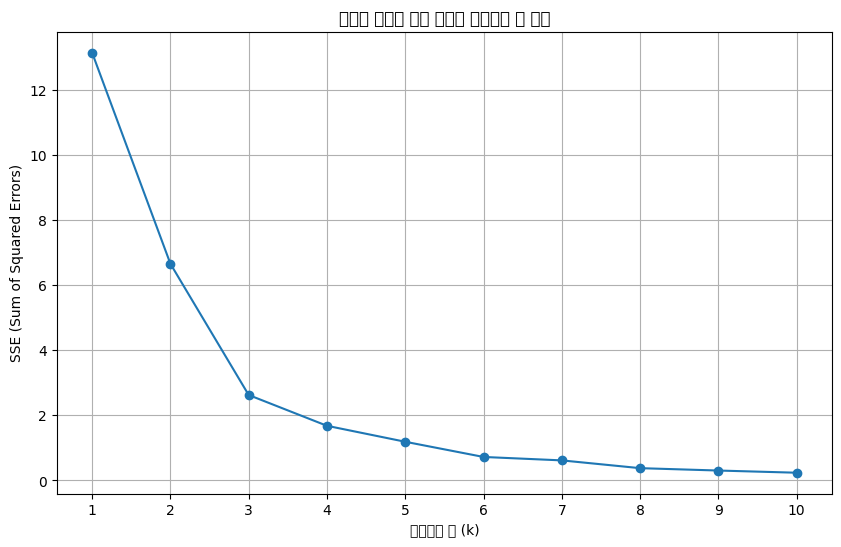

In [59]:
sse = []
k_range = range(1, 11)  # k=1부터 k=10까지 시도

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(unique_df[['score']])
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('엘보우 방법을 통한 최적의 클러스터 수 결정')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

<ipython-input-60-79a425f35221>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y='score', data=unique_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missin

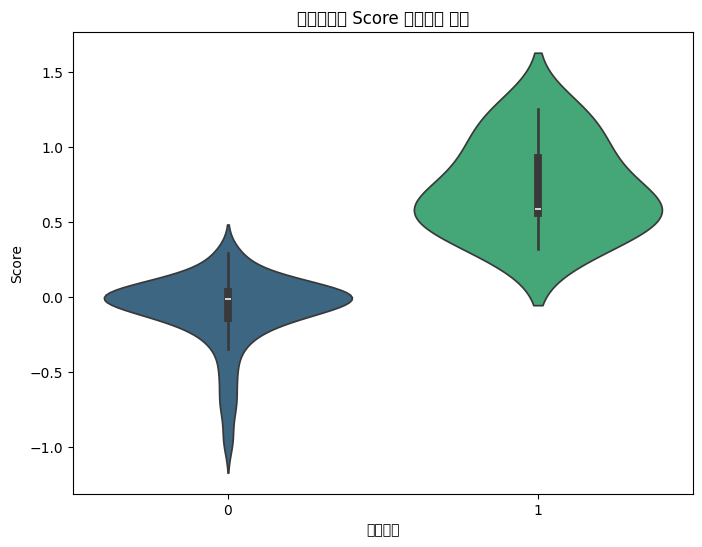

In [60]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='cluster', y='score', data=unique_df, palette='viridis')
plt.title('클러스터별 Score 바이올린 플롯')
plt.xlabel('클러스터')
plt.ylabel('Score')
plt.show()

주가예측

In [65]:
stk_dt_qut_medel=stk_dt_qut[['bse_dt', 'tck_iem_cd', 'iem_end_pr', 'acl_trd_qty']]
stk_dt_qut_medel

,bse_dt,tck_iem_cd,iem_end_pr,acl_trd_qty
0,20240722,AAL,10.69,38895463.0
1,20240603,AAL,11.53,52899042.0
2,20240531,AAL,11.50,60868405.0
3,20240625,AAL,11.13,28547274.0
4,20240605,AAL,11.62,34340914.0
...,...,...,...,...
194826,20240702,ZS,196.66,1725207.0
194827,20240807,ZS,166.20,1362130.0
194828,20240617,ZS,184.38,1790442.0
194829,20240815,ZS,190.34,1583690.0


In [66]:
#stk_dt_qut_medel  to datetime
stk_dt_qut_medel['bse_dt'] = pd.to_datetime(stk_dt_qut_medel['bse_dt'], format='%Y%m%d')
stk_dt_qut_medel


<ipython-input-66-9bb4868074b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_dt_qut_medel['bse_dt'] = pd.to_datetime(stk_dt_qut_medel['bse_dt'], format='%Y%m%d')


,bse_dt,tck_iem_cd,iem_end_pr,acl_trd_qty
0,2024-07-22,AAL,10.69,38895463.0
1,2024-06-03,AAL,11.53,52899042.0
2,2024-05-31,AAL,11.50,60868405.0
3,2024-06-25,AAL,11.13,28547274.0
4,2024-06-05,AAL,11.62,34340914.0
...,...,...,...,...
194826,2024-07-02,ZS,196.66,1725207.0
194827,2024-08-07,ZS,166.20,1362130.0
194828,2024-06-17,ZS,184.38,1790442.0
194829,2024-08-15,ZS,190.34,1583690.0


In [67]:
# bse_dt 컬럼 rename
stk_dt_qut_medel = stk_dt_qut_medel.rename(columns={'bse_dt':'Date'})

In [68]:
news=pd.read_csv("/content/news_results.csv")
news['Date'] = pd.to_datetime(news['Date'], errors='coerce')

<ipython-input-68-6eb8114027d6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news['Date'] = pd.to_datetime(news['Date'], errors='coerce')


In [69]:
#news rename
news = news.rename(columns={'Ticker':'tck_iem_cd','Date	':'bse_dt	'})
news

,tck_iem_cd,Date,Title,Link,Content
0,AAPB,2004-10-24,Is Invesco S&P 500 Equal Weight Financials ETF...,https://finance.yahoo.com/news/invesco-p-500-e...,The Invesco S&P 500 Equal Weight Financials ET...
1,AAPB,2003-10-24,American Century Debuting European ETFs With A...,https://finance.yahoo.com/news/american-centur...,American Century has made its European debut w...
2,AAPB,2003-10-24,Unsure Which AI Stock to Buy? Check Out This E...,https://finance.yahoo.com/news/unsure-ai-stock...,Investing in artificial intelligence (AI) can ...
3,AAPB,2002-10-24,Sector Update: Financial Stocks Decline Wednes...,https://finance.yahoo.com/news/sector-financia...,Sector Update: Financial Stocks Decline Wednes...
4,AAPB,2002-10-24,How investors can get in on the China stock ra...,https://finance.yahoo.com/video/investors-chin...,China stocks (^HSI) have extended their rally ...
...,...,...,...,...,...
1322,TAN,2024-02-21,SolarEdge stock tanks on 'abrupt slowdown in d...,https://finance.yahoo.com/news/solaredge-stock...,SolarEdge (SEDG) stock sank around 14% on Wedn...
1323,TAN,2023-12-19,"Why solar energy stocks may be down, but not o...",https://finance.yahoo.com/video/why-solar-ener...,Solar energy stocks have taken a hit in 2023 d...
1324,TAN,2023-12-15,Solar stocks pop after Fed signals rate cuts,https://finance.yahoo.com/news/solar-stocks-po...,Market optimism for rate cuts has sent renewab...
1325,TAN,2023-12-15,Jefferies initiates coverage on solar energy s...,https://finance.yahoo.com/video/jefferies-init...,Higher interest rates have been a headwind for...


In [70]:
#tck_iem_cd	Date 기준으로 merge
df2 = pd.merge(stk_dt_qut_medel, news, on=['tck_iem_cd', 'Date'], how='left')
df2=df2.sort_values(by=['tck_iem_cd', 'Date'])


In [71]:
df2=df2[['tck_iem_cd', 'Date', 'iem_end_pr', 'acl_trd_qty', 'Title']]
df2

,tck_iem_cd,Date,iem_end_pr,acl_trd_qty,Title
100878,AA,2024-05-28,43.20,7888482.0,NaN
100891,AA,2024-05-29,43.93,5275412.0,NaN
100847,AA,2024-05-30,44.54,5824970.0,NaN
100887,AA,2024-05-31,44.27,4527342.0,NaN
100874,AA,2024-06-03,44.01,3887113.0,NaN
...,...,...,...,...,...
100819,ZYXI,2024-08-20,7.65,80521.0,NaN
100795,ZYXI,2024-08-21,7.73,53251.0,NaN
100815,ZYXI,2024-08-22,7.75,78763.0,NaN
100804,ZYXI,2024-08-23,8.19,109444.0,NaN


In [72]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


df2['Title'] = df2['Title'].fillna('')

# Title을 공백으로 분리하여 단어 리스트로 변환
sentences = [title.split() for title in df2['Title']]

# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 각 Title에 대한 벡터 생성
def get_vector(title):
    if title == "":
        return np.zeros(100)  # null값에 대해 0 벡터
    vector = np.zeros(100)  # 100 차원 벡터
    words = title.split()
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
    return vector / len(words) if words else vector

# 벡터 생성하여 새로운 DataFrame에 추가
df_vectors = pd.DataFrame(df2['Title'].apply(get_vector).tolist(), columns=[f'vector_{i+1}' for i in range(100)])

result_df = pd.concat([df2, df_vectors], axis=1)

In [73]:
result_df['iem_end_pr_shift'] = result_df.groupby('tck_iem_cd')['iem_end_pr'].shift(-1)


result_df['iem_end'] = (result_df['iem_end_pr'] < result_df['iem_end_pr_shift']).astype(int)

In [79]:

result_df['tck_iem_cd'] = pd.factorize(result_df['tck_iem_cd'])[0]
#Title컬럼 제거
result_df_train=result_df.drop('Title',axis=1)

result_df_train=result_df_train.drop('iem_end_pr_shift',axis=1)

In [80]:
#result_df_train=result_df_train[['tck_iem_cd','Date','iem_end_pr','acl_trd_qty','iem_end']]

In [78]:
test_X = result_df_train[result_df_train['Date'] == pd.to_datetime('2024-08-26')].drop(['iem_end', 'Date'], axis=1)
# test_Y: '2024-08-26'인 행의 'iem_end' 추출
test_Y = result_df_train[result_df_train['Date'] == pd.to_datetime('2024-08-26')]['iem_end']

# train_X: '2024-08-26'이 아닌 행에서 'iem_end'와 'Date' 컬럼 제거
train_X = result_df_train[result_df_train['Date'] != pd.to_datetime('2024-08-26')].drop(['iem_end', 'Date'], axis=1)

# train_Y: '2024-08-26'이 아닌 행의 'iem_end' 추출
train_Y = result_df_train[result_df_train['Date'] != pd.to_datetime('2024-08-26')]['iem_end']

KeyError: "['iem_end'] not found in axis"

In [36]:
pip install catboost

In [84]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import datetime
import nltk
import pandas as pd
import numpy as np
##import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#주가데이터 가져오기

#모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC

#모델저장 라이브러리
import pickle
import os
models = {

    "Random Forest Classifier": RandomForestClassifier(random_state=41),

    "Gradient Boosting": GradientBoostingClassifier(random_state=41),

    "Bagging": BaggingClassifier(random_state=41),

   # "svr":SVR(),
    "XGBClassifier Classifier": xgb.XGBClassifier(seed=41),
    'LGBM':LGBMClassifier(n_estimators=100,random_state=41,verbose=0),
    'catbost':CatBoostClassifier(random_state=41,verbose=0),


}
lst=[]
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():


        # X_val_fold, y_val_fold를 검증 데이터셋으로 사용하여 모델을 평가
      model.fit(train_X, train_Y )
      predicted_probabilities = model.predict_proba(test_X)

      # 결과 출력
      print(predicted_probabilities)

      accuracy = accuracy_score(y_pred, test_Y)
      # 평균 정확도, F1 점수, Recall 점수 계산

      print("{} Mean Cross-Validation Accuracy Score: {} : ".format(name, accuracy))

[[0.92 0.08]
 [0.59 0.41]
 [0.53 0.47]
 ...
 [0.63 0.37]
 [0.23 0.77]
 [0.83 0.17]]
Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.5801551389786684 : 
[[0.53995307 0.46004693]
 [0.57419849 0.42580151]
 [0.52922931 0.47077069]
 ...
 [0.48377974 0.51622026]
 [0.50029058 0.49970942]
 [0.51317674 0.48682326]]
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.5801551389786684 : 
[[0.9 0.1]
 [0.5 0.5]
 [0.4 0.6]
 ...
 [0.6 0.4]
 [0.1 0.9]
 [0.8 0.2]]
Bagging Mean Cross-Validation Accuracy Score: 0.5801551389786684 : 
[[0.532352   0.467648  ]
 [0.7089411  0.29105893]
 [0.55246437 0.44753563]
 ...
 [0.4782791  0.5217209 ]
 [0.48176283 0.5182372 ]
 [0.62416995 0.37583005]]
XGBClassifier Classifier Mean Cross-Validation Accuracy Score: 0.5801551389786684 : 
[[0.50331372 0.49668628]
 [0.60447265 0.39552735]
 [0.49310202 0.50689798]
 ...
 [0.49513138 0.50486862]
 [0.4768348  0.5231652 ]
 [0.58655557 0.41344443]]
LGBM Mean Cross-Validation Accuracy Score: 0.580155138978668

In [83]:
result_df

,tck_iem_cd,Date,iem_end_pr,acl_trd_qty,Title,vector_1,vector_2,vector_3,vector_4,vector_5,...,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100,iem_end_pr_shift,iem_end
100878,0,2024-05-28,43.20,7888482.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.93,1
100891,0,2024-05-29,43.93,5275412.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.54,1
100847,0,2024-05-30,44.54,5824970.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.27,0
100887,0,2024-05-31,44.27,4527342.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.01,0
100874,0,2024-06-03,44.01,3887113.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,3093,2024-08-20,7.65,80521.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.73,1
100795,3093,2024-08-21,7.73,53251.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.75,1
100815,3093,2024-08-22,7.75,78763.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.19,1
100804,3093,2024-08-23,8.19,109444.0,,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.35,1
